## Machine Learning Assignment 1
### Murtaza Hussain (29449) and Muhammad Asad ur Rehman (29456)
UCI-ML Dataset Link: https://archive.ics.uci.edu/dataset/186/wine+quality

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from lazypredict.Supervised import LazyClassifier

In [2]:
# Data Loader loads data from UCI-ML Repo
def load_dataset():
    # fetch dataset
    mushroom = fetch_ucirepo(id=186) 

    # data (as pandas dataframes) 
    x = mushroom.data.features 
    y = mushroom.data.targets 
    z = mushroom.data.original

    # metadata 
    print(mushroom.metadata) 

    # variable information 
    print(mushroom.variables)

    return x, y, z

# UCI-ML Repo Provides us with 3 Pandas DF inherently:
# 1. features (contains only the features)
# 2. targets (the targets to be preddicted)
# 3. original (contains both features and targets)
features, targets, original = load_dataset()

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [3]:
# This function performs a missing value analysis on each column of the dataset, helps you decide on what to do in cleaning process
def null_check(df):
    null_columns = []
    for column in df.columns:
        print("Column Name:", column)
        print("Column DataType:", df[column].dtype)
        if df[column].dtype != 'float64':
            print("Column unique values:", df[column].unique())
        print("Column has null:", df[column].isnull().any())
        if df[column].isnull().any() == True:
            print("Column Null Count:", df[column].isnull().sum())
            null_columns.append(column)
        print("\n")
    return null_columns

null_cols = null_check(original)

Column Name: fixed_acidity
Column DataType: float64
Column has null: False


Column Name: volatile_acidity
Column DataType: float64
Column has null: False


Column Name: citric_acid
Column DataType: float64
Column has null: False


Column Name: residual_sugar
Column DataType: float64
Column has null: False


Column Name: chlorides
Column DataType: float64
Column has null: False


Column Name: free_sulfur_dioxide
Column DataType: float64
Column has null: False


Column Name: total_sulfur_dioxide
Column DataType: float64
Column has null: False


Column Name: density
Column DataType: float64
Column has null: False


Column Name: pH
Column DataType: float64
Column has null: False


Column Name: sulphates
Column DataType: float64
Column has null: False


Column Name: alcohol
Column DataType: float64
Column has null: False


Column Name: quality
Column DataType: int64
Column unique values: [5 6 7 4 8 3 9]
Column has null: False


Column Name: color
Column DataType: object
Column unique value

In [4]:
# This function drops any null columns and missing values
# This is where you decide whether to remove NULL rows (which will reduce the size of Dataset) or remove NULL columns entirely. You can also choose a combination of both.
def clean_data(df, drop_columns, missing_value):
    # Remove unnecessary columns
    df.drop(drop_columns, axis=1, inplace=True)
    # Drop rows with any missing values
    if missing_value == False:
        df.dropna(inplace=True)
    else:
        df.fillna(missing_value, inplace=True)
    return df

clean_data(original,null_cols,False)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,red
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,red
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,red
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,red
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.20,0.21,0.29,1.60,0.04,24.00,92.00,0.99,3.27,0.50,11.20,6,white
6493,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.99,3.15,0.46,9.60,5,white
6494,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.99,2.99,0.46,9.40,6,white
6495,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.99,3.34,0.38,12.80,7,white


In [5]:
# Transforms categorical and numberical data into numerical data
def transform_data(df):
    # Encode categorical variables
    label_encoder = LabelEncoder()
    print("Categorical columns:", df.select_dtypes(include=['object']).columns)
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col])
    
    # Standardize numerical features
    scaler = StandardScaler()
    print("Numerical columns:", df.select_dtypes(include=['float64', 'int64']).columns)
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if len(numerical_cols) > 0:
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

transform_data(original)

Categorical columns: Index(['color'], dtype='object')
Numerical columns: Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.14,2.19,-2.19,-0.74,0.57,-1.10,-1.45,1.03,1.81,0.19,-0.92,-0.94,0
1,0.45,3.28,-2.19,-0.60,1.20,-0.31,-0.86,0.70,-0.12,1.00,-0.58,-0.94,0
2,0.45,2.55,-1.92,-0.66,1.03,-0.87,-1.09,0.77,0.26,0.80,-0.58,-0.94,0
3,3.07,-0.36,1.66,-0.74,0.54,-0.76,-0.99,1.10,-0.36,0.33,-0.58,0.21,0
4,0.14,2.19,-2.19,-0.74,0.57,-1.10,-1.45,1.03,1.81,0.19,-0.92,-0.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.78,-0.79,-0.20,-0.81,-0.49,-0.37,-0.42,-1.19,0.32,-0.21,0.59,0.21,1
6493,-0.47,-0.12,0.28,0.54,-0.26,1.49,0.92,0.07,-0.43,-0.48,-0.75,-0.94,1
6494,-0.55,-0.61,-0.89,-0.89,-0.43,-0.03,-0.08,-0.72,-1.42,-0.48,-0.92,0.21,1
6495,-1.32,-0.30,-0.13,-0.91,-0.97,-0.59,-0.10,-2.00,0.76,-1.02,1.94,1.35,1


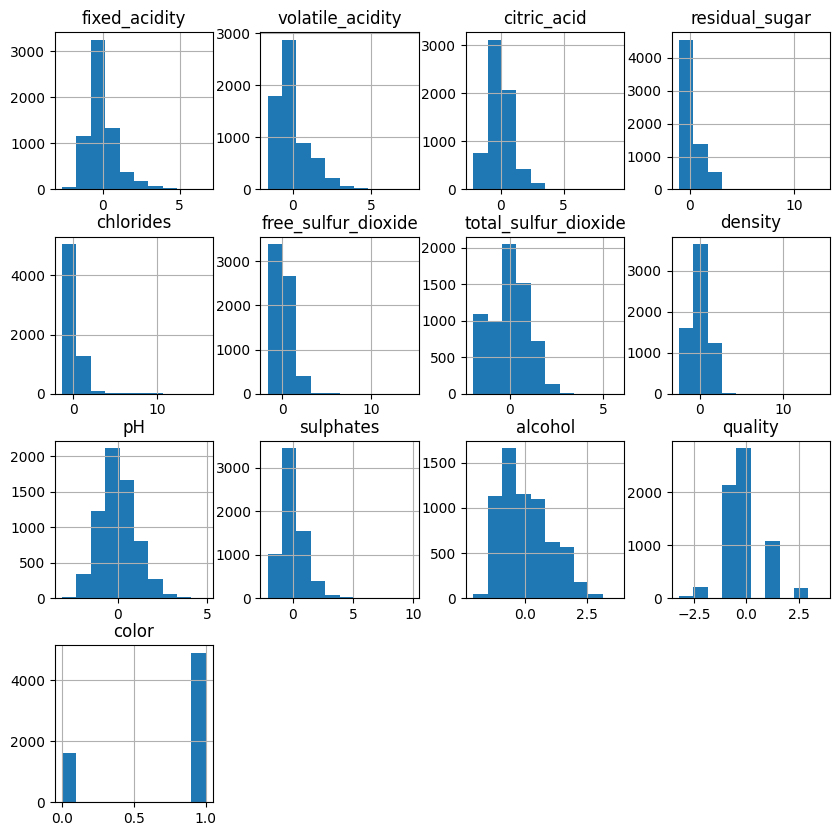

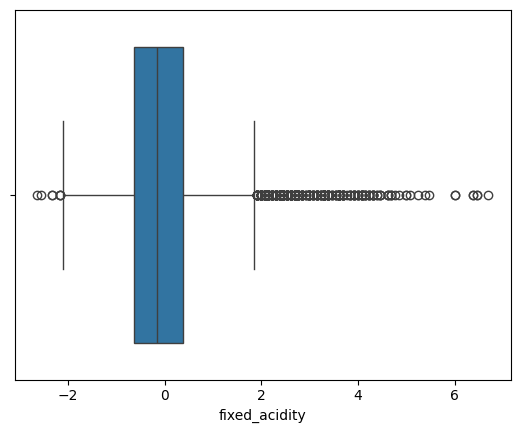

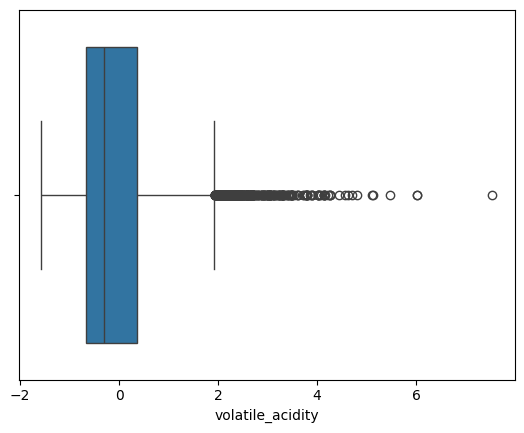

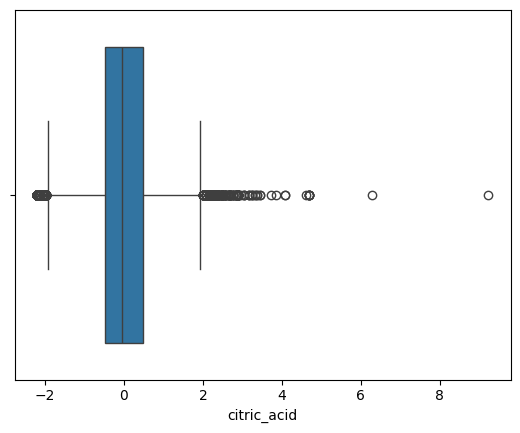

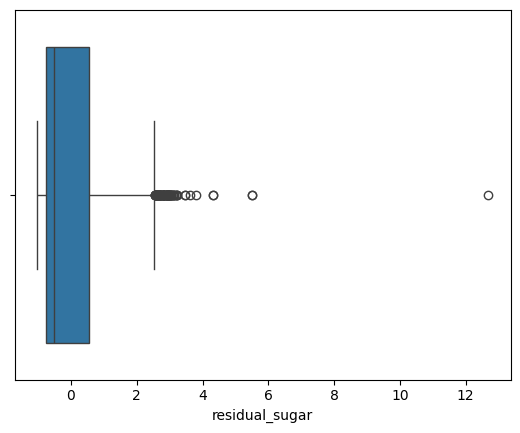

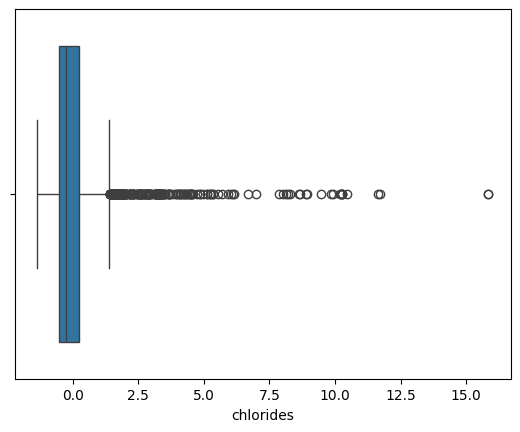

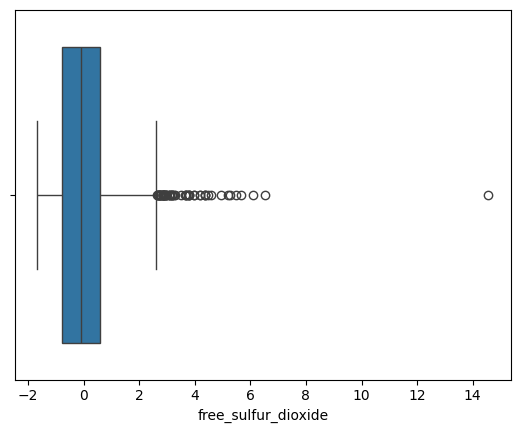

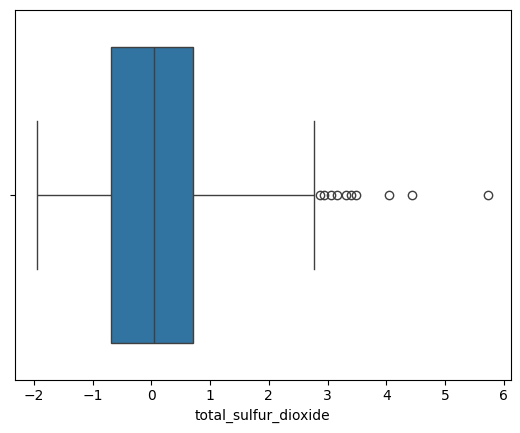

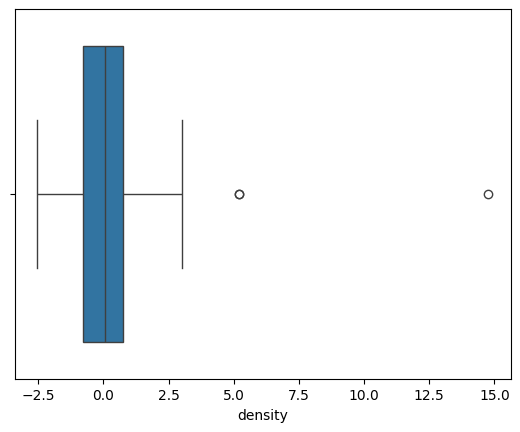

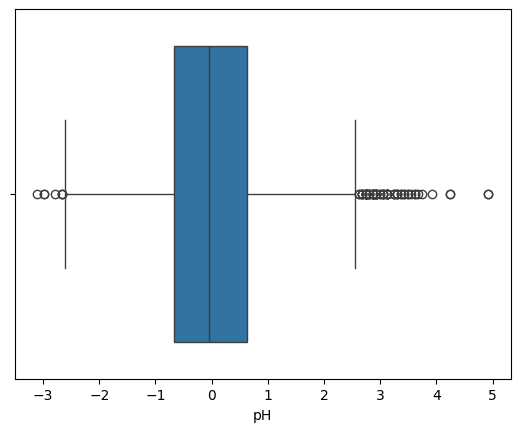

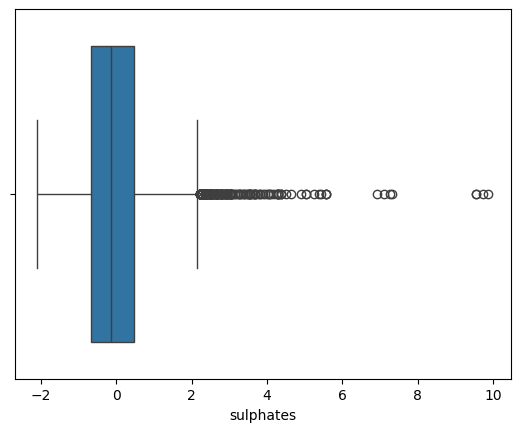

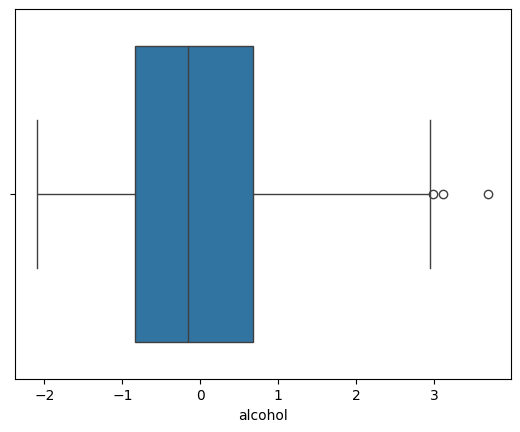

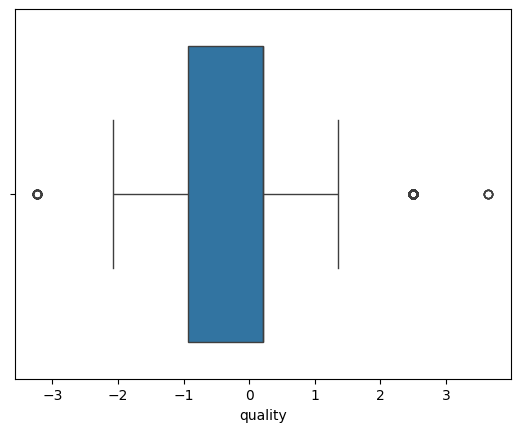

In [6]:
# Creates histograms for categorical data
def plot_histograms(df):
    df.hist(figsize=(10, 10))
    plt.show()

# Creates boxplot for numerical data
def plot_boxplots(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        sns.boxplot(x=df[col])
        plt.show()

plot_histograms(original)
plot_boxplots(original)

In [7]:
def outlier_removal(df, excluded_columns = []):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        if column not in excluded_columns:
            # Calculate Q1, Q3, and IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Define the range for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out outliers
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [8]:
def generate_summary_statistics(original):
    """
    Generate summary statistics for a given DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    DataFrame: Summary statistics DataFrame.
    """
    # Compute mean
    mean = original.mean()

    # Compute mode
    mode = original.mode().iloc[0]  # Mode may have multiple values, so we take the first one

    # Compute median
    median = original.median()

    # Compute quartiles
    quartiles = original.quantile([0.25, 0.5, 0.75])

    # Compute minimum and maximum
    minimum = original.min()
    maximum = original.max()

    # Combine the results into a DataFrame for easier visualization
    summary_df = pd.DataFrame({
        'Mean': mean,
        'Mode': mode,
        'Median': median,
        'Q1': quartiles.loc[0.25],
        'Q2': quartiles.loc[0.5],
        'Q3': quartiles.loc[0.75],
        'Minimum': minimum,
        'Maximum': maximum
    })

    return summary_df

In [9]:
# Runs KNNClassifier on default settings
def knn_classifier(df, target_name):
    # Separate features and targets and perform data splitting
    X = df.drop(target_name, axis=1)
    y = df[target_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    knn_model = KNeighborsClassifier()
    
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test)
    print(classification_report(y_test, predictions))
    print("Accuracy:", accuracy_score(y_test, predictions))

In [10]:
# Runs KNN CV on default settings
def knn_cv(df, target_name, cv=5):

    # Separate features and targets
    X = df.drop(target_name, axis=1)
    y = df[target_name]

    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier()
    
    # Initialize k-fold cross-validation
    k_fold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Perform cross-validation and compute scores
    scores = cross_val_score(knn_classifier, X, y, cv=k_fold, scoring='accuracy')
    
    # Calculate and print the mean and standard deviation of the scores
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", mean_accuracy)
    print("Standard Deviation of Accuracy:", std_accuracy)

In [11]:
def lazy_classifier(df, target_name):
    # Separate features and targets and perform data splitting
    X = df.drop(target_name, axis=1)
    y = df[target_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Initialize Lazy Classifier
    clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None, predictions=True)

    # Generate predictions and evaluate performance
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    print("Mean Accuracy of the Dataset: ", models['Accuracy'].mean())
    print("Standard Deviation of Accuracy of the Dataset: ", models['Accuracy'].std())
    
    return models

model = lazy_classifier(original, targets.columns[0])

 24%|██▍       | 7/29 [00:00<00:00, 66.10it/s]

AdaBoostClassifier model failed to execute
Unknown label type: 'continuous'
BaggingClassifier model failed to execute
Unknown label type: 'continuous'
BernoulliNB model failed to execute
Unknown label type: (array([-0.93722961,  1.35322771, -0.93722961, ...,  1.35322771,
        0.20799905,  0.20799905]),)
CalibratedClassifierCV model failed to execute
Unknown label type: 'continuous'
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
DecisionTreeClassifier model failed to execute
Unknown label type: 'continuous'
DummyClassifier model failed to execute
continuous is not supported
ExtraTreeClassifier model failed to execute
Unknown label type: 'continuous'
ExtraTreesClassifier model failed to execute
Unknown label type: 'continuous'
GaussianNB model failed to execute
Unknown label type: (array([-3.22768694, -2.08245828, -0.93722961,  0.20799905,  1.35322771,
        2.49845638,  3.64368504]),)
KNeighborsClassifier model failed to execute
Unkn

 90%|████████▉ | 26/29 [00:00<00:00, 69.28it/s]

NearestCentroid model failed to execute
Unknown label type: 'continuous'
NuSVC model failed to execute
Unknown label type: 'continuous'
PassiveAggressiveClassifier model failed to execute
Unknown label type: (array([-3.22768694, -2.08245828, -0.93722961,  0.20799905,  1.35322771,
        2.49845638,  3.64368504]),)
Perceptron model failed to execute
Unknown label type: (array([-3.22768694, -2.08245828, -0.93722961,  0.20799905,  1.35322771,
        2.49845638,  3.64368504]),)
QuadraticDiscriminantAnalysis model failed to execute
Unknown label type: 'continuous'
RandomForestClassifier model failed to execute
Unknown label type: 'continuous'
RidgeClassifier model failed to execute
Unknown label type: (array([-0.93722961,  1.35322771, -0.93722961, ...,  1.35322771,
        0.20799905,  0.20799905]),)
RidgeClassifierCV model failed to execute
Unknown label type: (array([-0.93722961,  1.35322771, -0.93722961, ...,  1.35322771,
        0.20799905,  0.20799905]),)
SGDClassifier model failed t

100%|██████████| 29/29 [00:00<00:00, 71.68it/s]

Mean Accuracy of the Dataset:  nan
Standard Deviation of Accuracy of the Dataset:  nan


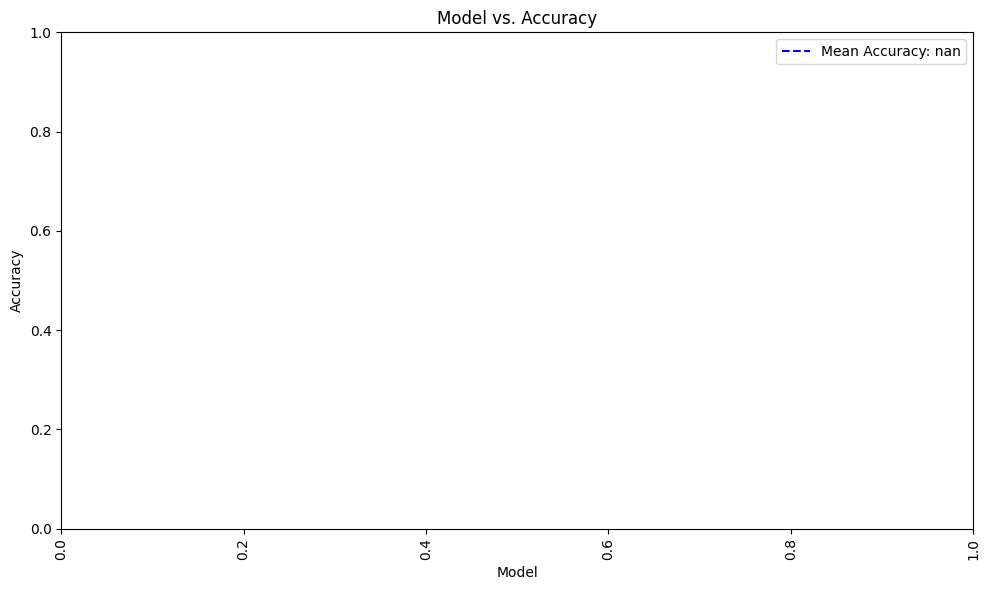

In [12]:
# Plot a model vs Accuracy graph for Lazy Predict
def plot_model_accuracy_graph(df):
    mean_accuracy = df['Accuracy'].mean()
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Model', y='Accuracy', data=df, palette='coolwarm')
    plt.axhline(mean_accuracy, color='blue', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2f}')
    plt.title('Model vs. Accuracy')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)
    plt.legend()

    for i in range(len(df)):
        plt.text(i, df['Accuracy'][i], f"{df['Accuracy'][i]:.2f}", ha = 'center', va = 'bottom')

    plt.tight_layout()
    plt.show()

plot_model_accuracy_graph(model)

In [13]:
# Master Workflow, combines and manages all the workflow from one place
# Specifically Tailored for Mushroom Dataset
def master_workflow():
    features, targets, original = load_dataset()
    # Perform an extra-step to convert wine-quality(target) to a categorical column where a rating of 5 or above means a good wine else bad
    original['quality'] = np.where(original['quality'] >= 5, 'good', 'bad')

    null_cols = null_check(original)
    original = clean_data(original,null_cols,False)
    original = transform_data(original)
    print("Original Summary Statistics: \n", generate_summary_statistics(original))
    plot_histograms(original)
    print("Original Boxplots: \n")
    plot_boxplots(original)
    original = outlier_removal(original)
    print("Summary Statistics after outlier removal: \n", generate_summary_statistics(original))
    print("Boxplots after outlier removal: \n")
    plot_boxplots(original)
    print("KNN Classifier:")
    knn_classifier(original, targets.columns[0])
    print("Cross-Validation with KNN Classifier:")
    knn_cv(original, targets.columns[0])
    print("Lazy Predict for different models:")
    model = lazy_classifier(original, targets.columns[0])
    plot_model_accuracy_graph(model)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

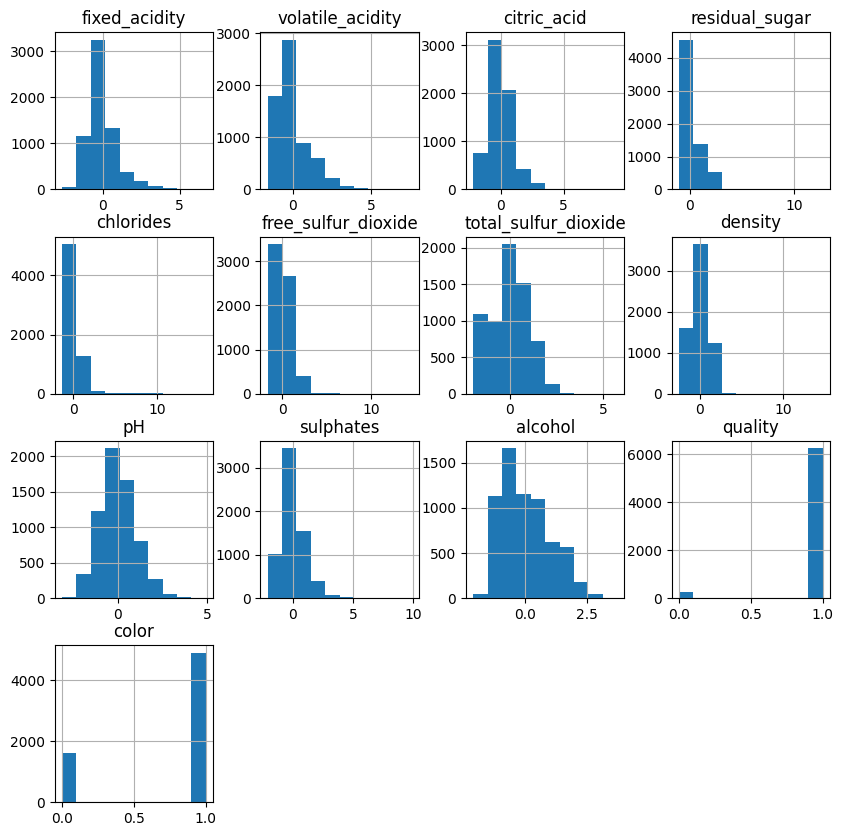

Original Boxplots: 



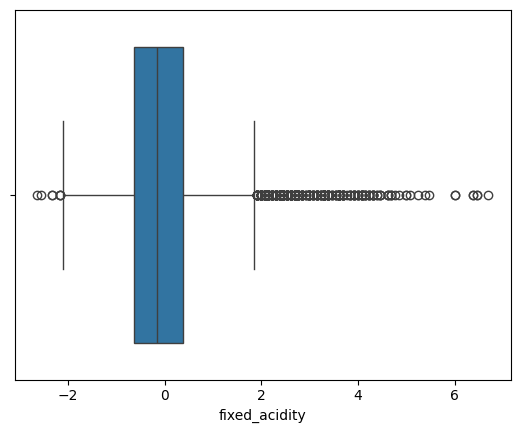

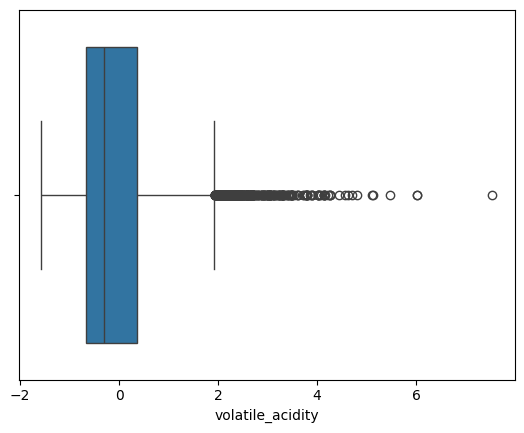

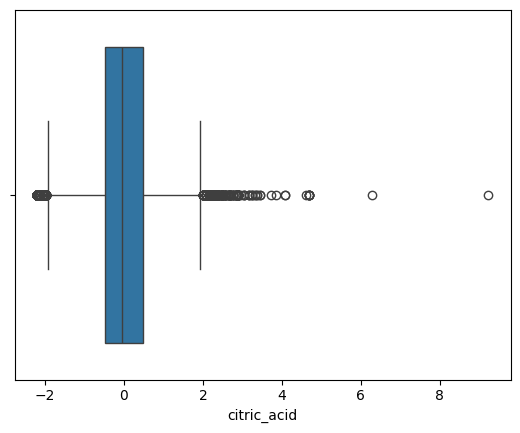

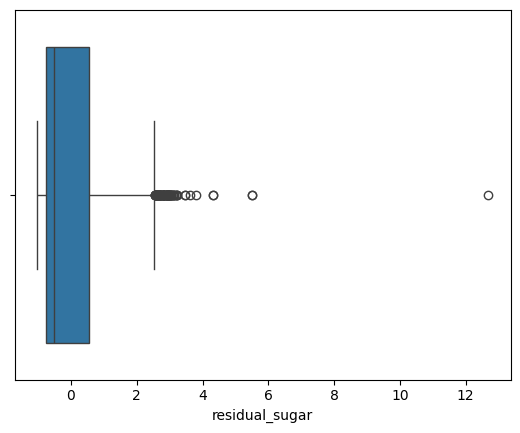

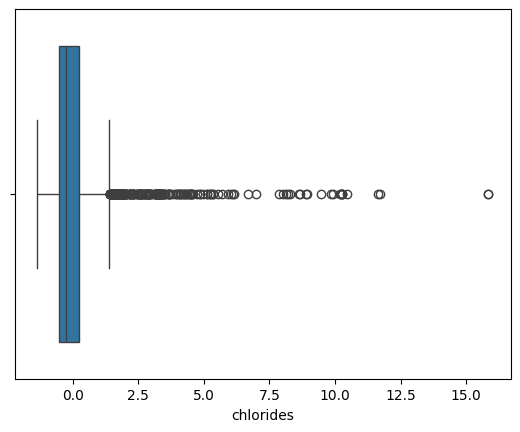

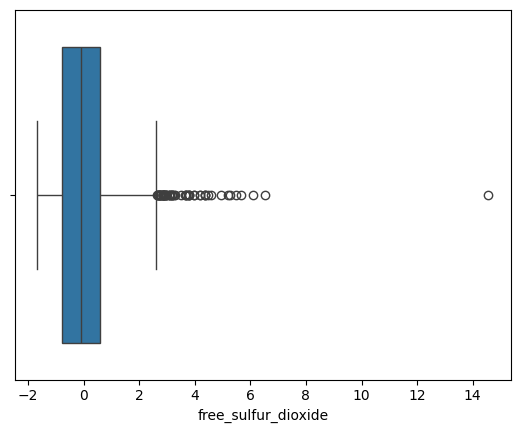

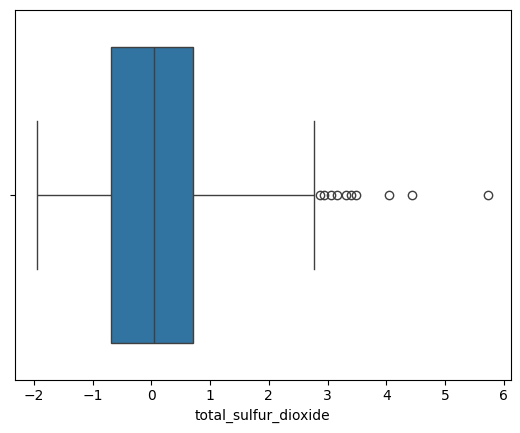

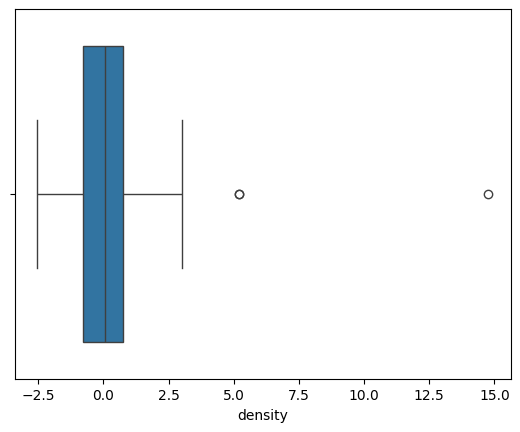

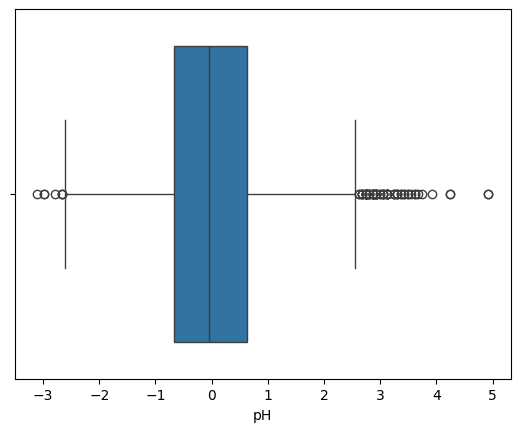

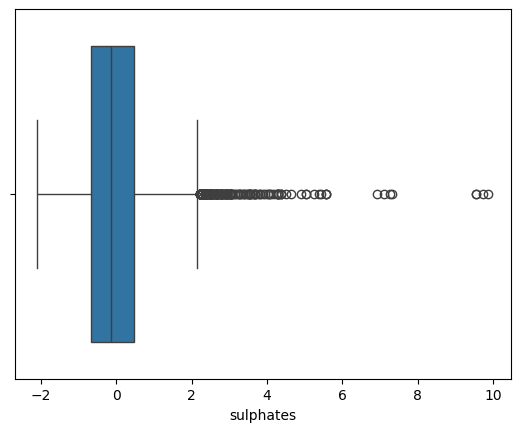

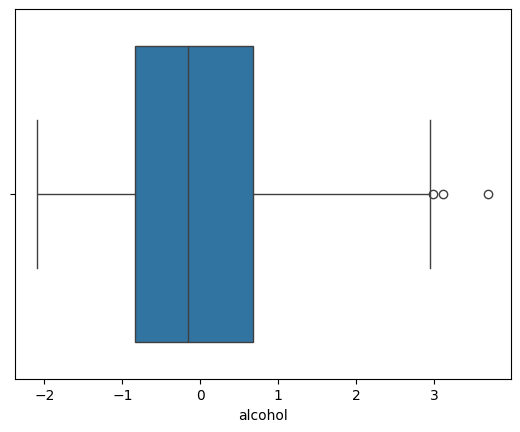

Summary Statistics after outlier removal: 
                       Mean  Mode  Median    Q1    Q2    Q3  Minimum  Maximum
fixed_acidity        -0.23 -0.32   -0.32 -0.63 -0.32  0.14    -1.94     1.84
volatile_acidity     -0.32 -0.36   -0.42 -0.79 -0.42 -0.03    -1.58     1.85
citric_acid          -0.00 -0.13   -0.06 -0.40 -0.06  0.35    -1.64     1.59
residual_sugar        0.09 -0.89   -0.20 -0.77 -0.20  0.71    -1.02     2.81
chlorides            -0.31 -0.57   -0.34 -0.57 -0.34 -0.12    -1.34     0.77
free_sulfur_dioxide   0.13 -0.09    0.08 -0.54  0.08  0.74    -1.61     2.67
total_sulfur_dioxide  0.23 -0.08    0.21 -0.30  0.21  0.80    -1.94     2.41
density              -0.22 -0.90   -0.27 -0.98 -0.27  0.48    -2.53     2.38
pH                   -0.09 -0.49   -0.12 -0.74 -0.12  0.51    -2.48     2.44
sulphates            -0.24 -0.21   -0.34 -0.82 -0.34  0.19    -2.09     1.74
alcohol               0.08 -0.83   -0.08 -0.83 -0.08  0.76    -1.75     3.11
quality               0.97  1.00

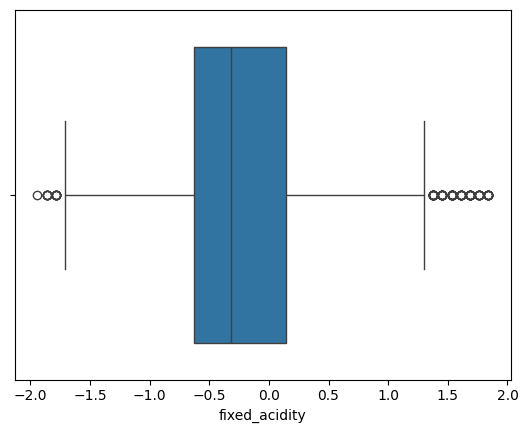

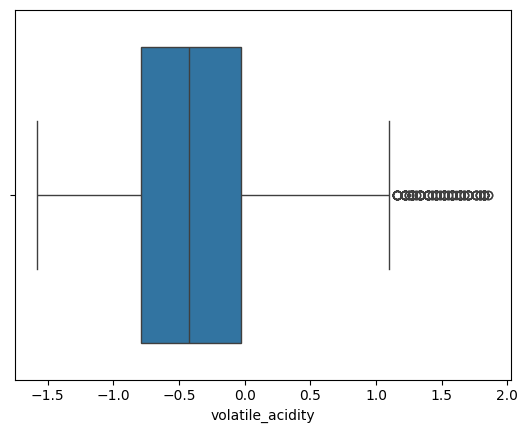

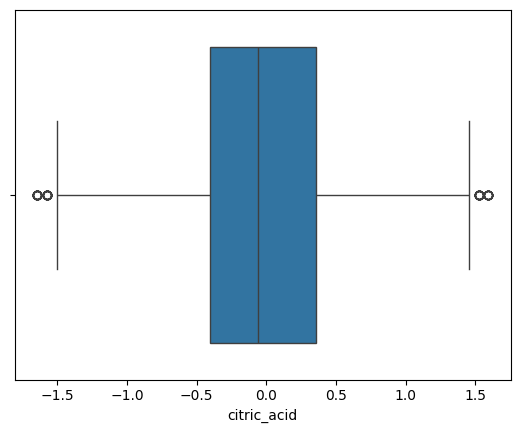

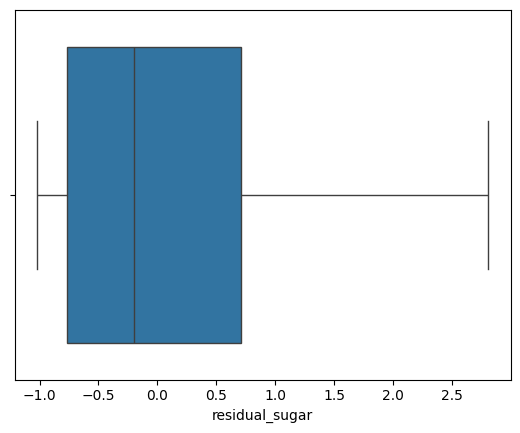

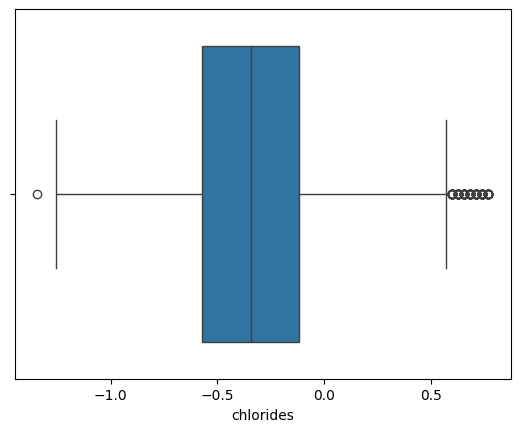

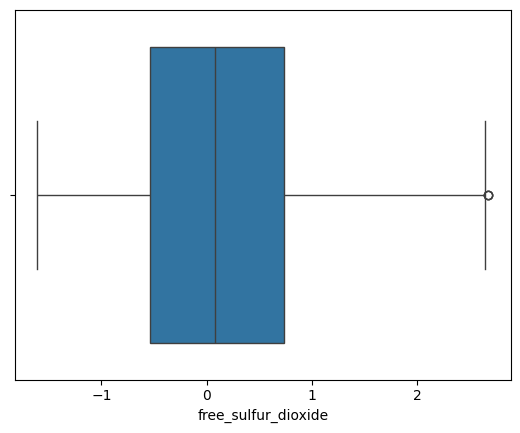

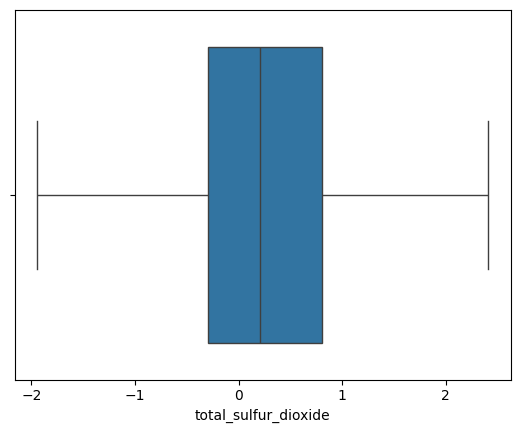

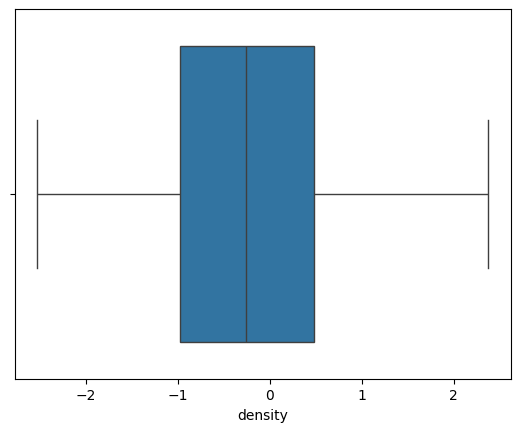

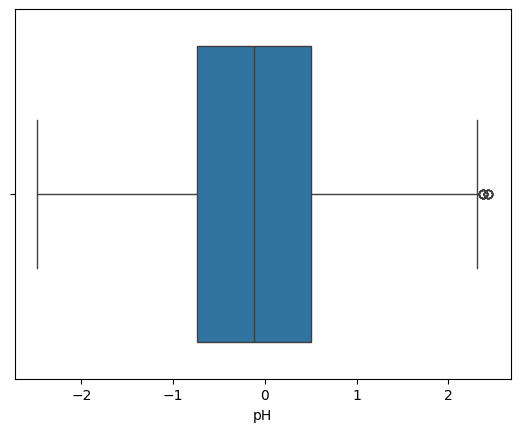

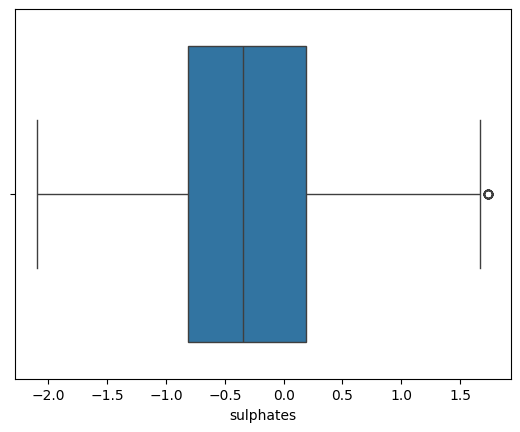

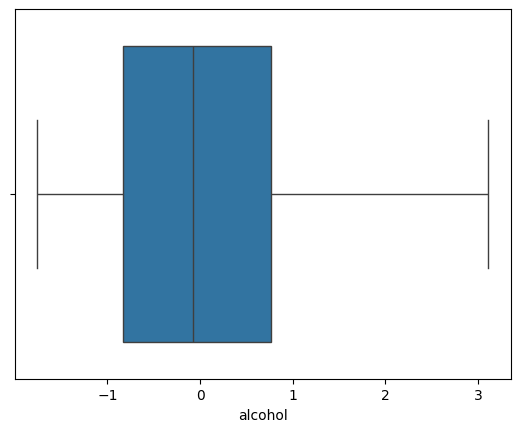

KNN Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.97      1.00      0.99       905

    accuracy                           0.97       931
   macro avg       0.49      0.50      0.49       931
weighted avg       0.94      0.97      0.96       931

Accuracy: 0.9709989258861439
Cross-Validation with KNN Classifier:
Cross-Validation Scores: [0.97099893 0.96992481 0.97311828 0.97204301 0.97204301]
Mean Accuracy: 0.9716256077982977
Standard Deviation of Accuracy: 0.0010827701450084495
Lazy Predict for different models:


 14%|█▍        | 4/29 [00:01<00:08,  2.94it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 52%|█████▏    | 15/29 [00:04<00:04,  3.27it/s]

NuSVC model failed to execute
specified nu is infeasible


 90%|████████▉ | 26/29 [00:05<00:00,  6.94it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:05<00:00,  5.02it/s]

[LightGBM] [Info] Number of positive: 3615, number of negative: 106
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 3721, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.971513 -> initscore=3.529408
[LightGBM] [Info] Start training from score 3.529408
Mean Accuracy of the Dataset:  0.9559200198297942
Standard Deviation of Accuracy of the Dataset:  0.052124062422316354


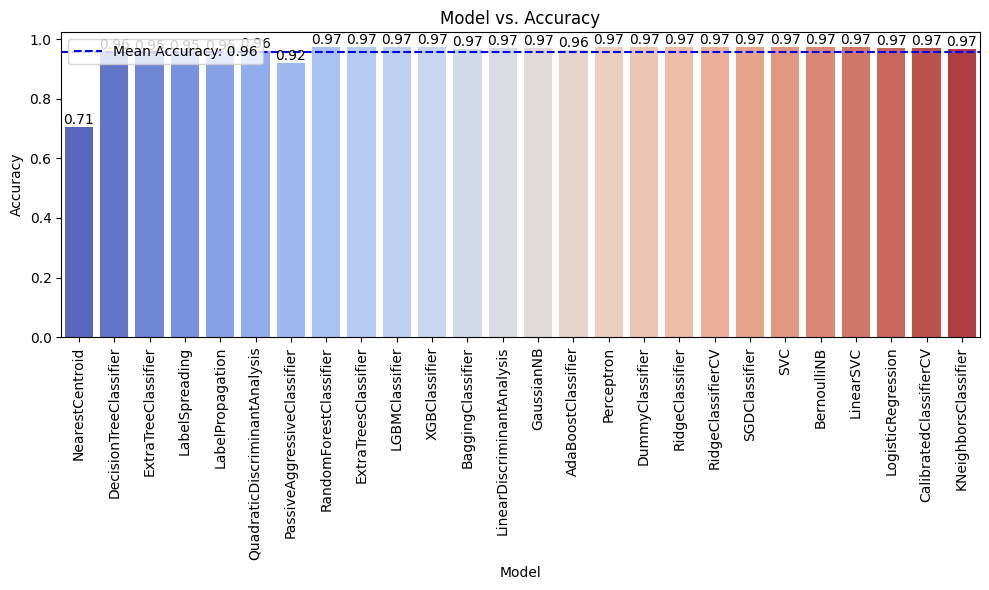

In [14]:
master_workflow()

### EDA Interpretation

Interpretation of EDA:
- Analysis of feature distributions and relationships showed that there was a significant amount of ouliers in almost all the continous columns.
- The dataset does not have any columns or features with Null values.


### ML Results Interpretation

Interpretation of ML Results:
- KNN was applied to the dataset, the accuracy of the model was 0.971.
- KNN with cross-validation was also applied to the dataset, the mean accuracy was 0.972 with a standard deviation of 0.001
- Additionally we also applied Lazy Predict on the dataset, the mean accuracy of the models was 0.956 with a standard deviation of 0.052
- The model performance suggests that the model has a data with related features and most of the outliers were also removed during the EDA process hence the high accuracy of the models.
- Although the features were mixed, there were only 2 classes in the target which has contributed massively in high accuracy of the models.